Exploring correlations within artists' social media data

In [1]:
import pandas as pd
import numpy as num
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
#Load dataset
df_socials = pd.read_csv("D:\Datasets\Artists social media data\dataset_artists_socials.csv")
df_socials.head()


,Unnamed: 0,Instagram followers,Youtube subs,TikTok followers,Spotify followers,Spotify listeners,Event date
0,0,NaN,NaN,NaN,NaN,NaN,2019-04-23
1,1,589.0,646.0,NaN,6212.0,382458.0,2018-10-09
2,2,49287.0,2208.0,NaN,75819.0,101122.0,2019-01-22
3,3,NaN,NaN,NaN,NaN,NaN,2019-01-23
4,4,NaN,NaN,NaN,NaN,NaN,2018-11-19


In [3]:
#Selecting rows that have all social figures filled ( All != NaN)
df_socials = df_socials[~df_socials.isnull().any(axis = 1)]
df_socials.head()

,Unnamed: 0,Instagram followers,Youtube subs,TikTok followers,Spotify followers,Spotify listeners,Event date
68,68,16065.0,581.0,171.0,2138.0,81315.0,2020-09-24
388,388,586979.0,300000.0,329700.0,299343.0,1656962.0,2020-07-14
599,599,4249610.0,3360000.0,2700000.0,2020839.0,8205666.0,2021-06-14
642,642,47705.0,7980.0,5073.0,48932.0,748772.0,2021-05-11
643,643,1677078.0,1500000.0,316600.0,1204061.0,2852790.0,2021-06-01


In [4]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
df_socials.describe()


,Unnamed: 0,Instagram followers,Youtube subs,TikTok followers,Spotify followers,Spotify listeners
count,12371.0,12371.0,12371.0,12371.0,12371.0,12371.0
mean,911298.8,2728355.7,1830911.1,870895.2,1710909.8,4998951.2
std,525755.7,11088073.2,5547557.3,3127356.0,4911821.9,9484157.2
min,68.0,68.0,3.0,0.0,40.0,21.0
25%,452865.5,56070.5,33000.0,3975.0,34011.0,373232.0
50%,901921.0,219429.0,161000.0,47400.0,220662.0,1620217.0
75%,1362768.0,1302363.0,1130000.0,301700.0,988751.0,5228765.0
max,1826907.0,176676194.0,63700000.0,33500000.0,46211692.0,76427845.0


[Text(0, 0, 'Unnamed: 0'),
 Text(1, 0, 'Instagram followers'),
 Text(2, 0, 'Youtube subs'),
 Text(3, 0, 'TikTok followers'),
 Text(4, 0, 'Spotify followers'),
 Text(5, 0, 'Spotify listeners')]

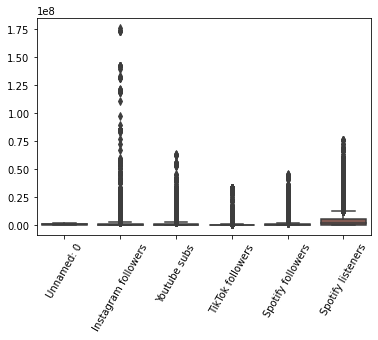

In [5]:
#Todo : Facetgrid / year pour observer si les distributions varient au fil des années
g = sns.boxplot(data = df_socials)
g.set_xticklabels(g.get_xticklabels(), rotation =60, fontsize = 10)


Trimming outliers - Removing Instamgram"s top 5%


In [6]:
#Trimming outliers - Removing Instamgram"s top 5%
the95 = df_socials["Instagram followers"].quantile(0.95)
df_socials = df_socials[df_socials["Instagram followers"] < the95 ]


[Text(0, 0, 'Unnamed: 0'),
 Text(1, 0, 'Instagram followers'),
 Text(2, 0, 'Youtube subs'),
 Text(3, 0, 'TikTok followers'),
 Text(4, 0, 'Spotify followers'),
 Text(5, 0, 'Spotify listeners')]

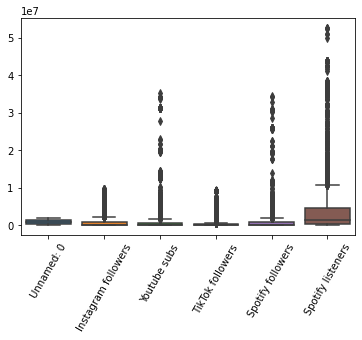

In [7]:

g = sns.boxplot(data = df_socials)
g.set_xticklabels(g.get_xticklabels(), rotation =60, fontsize = 10)


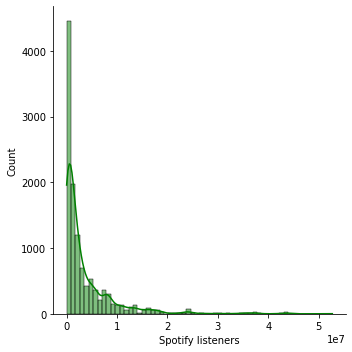

In [8]:

sns.displot(data = df_socials, x="Spotify listeners", kde = True, bins=60, color = "Green")


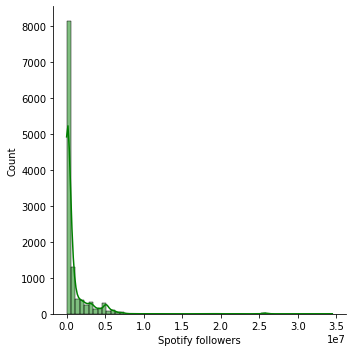

In [9]:
g = sns.displot(data = df_socials, x="Spotify followers", color = "green", bins = 60, kde= True)


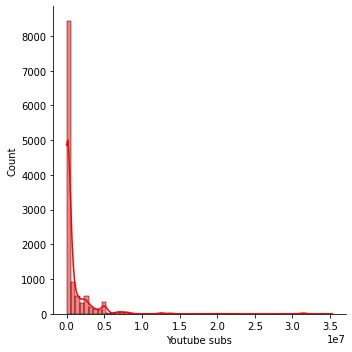

In [10]:
g = sns.displot(data = df_socials, x="Youtube subs", color = "red", bins = 60, kde = True)

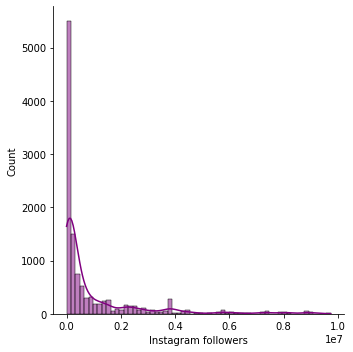

In [11]:
g = sns.displot(data = df_socials, x="Instagram followers", color = "purple", bins = 60, kde = True)

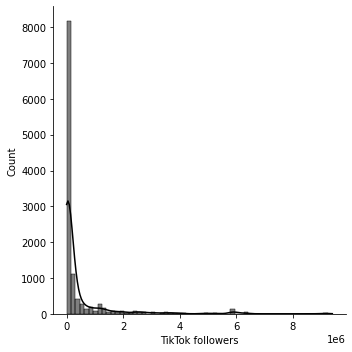

In [12]:
sns.displot(data = df_socials, x="TikTok followers", kde = True, bins=60, color = "black")


# Exploring correlations between TikTok and other platforms


In [18]:
df_socials_corr = df_socials.drop(columns=["Unnamed: 0", "Event date"], axis= 1)
df_socials_corr

,Instagram followers,Youtube subs,TikTok followers,Spotify followers,Spotify listeners
68,16065.0,581.0,171.0,2138.0,81315.0
388,586979.0,300000.0,329700.0,299343.0,1656962.0
599,4249610.0,3360000.0,2700000.0,2020839.0,8205666.0
642,47705.0,7980.0,5073.0,48932.0,748772.0
643,1677078.0,1500000.0,316600.0,1204061.0,2852790.0
...,...,...,...,...,...
1826478,7481.0,1500.0,511.0,4168.0,8889.0
1826596,2295398.0,5050000.0,5900000.0,22640.0,12794.0
1826770,443980.0,302000.0,1165.0,516387.0,2231113.0
1826771,680172.0,9210.0,610600.0,21245.0,21340.0


In [21]:

#Explore correlations between variables
corrmat = df_socials_corr.corr()
corrmat


,Instagram followers,Youtube subs,TikTok followers,Spotify followers,Spotify listeners
Instagram followers,1.0,0.7,0.5,0.7,0.7
Youtube subs,0.7,1.0,0.4,0.8,0.6
TikTok followers,0.5,0.4,1.0,0.2,0.3
Spotify followers,0.7,0.8,0.2,1.0,0.7
Spotify listeners,0.7,0.6,0.3,0.7,1.0


[Text(0.5, 0, 'Instagram followers'),
 Text(1.5, 0, 'Youtube subs'),
 Text(2.5, 0, 'TikTok followers'),
 Text(3.5, 0, 'Spotify followers'),
 Text(4.5, 0, 'Spotify listeners')]

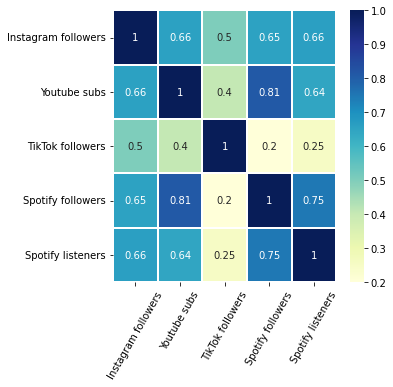

In [22]:
f, ax = plt.subplots(figsize =(5,5))
g = sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot = True)
g.set_xticklabels(g.get_xticklabels(), rotation =60, fontsize = 10)

In [24]:

# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df_socials_corr)


In [25]:
scaled
df_socials_scaled = pd.DataFrame(data= scaled, columns=["Instagram followers", "Youtube subs", "TikTok followers", "Spotify followers", "Spotify listeners"])

In [26]:

pd.set_option('display.float_format', lambda x: '%.1f' % x)
df_socials_scaled.describe()


,Instagram followers,Youtube subs,TikTok followers,Spotify followers,Spotify listeners
count,11752.0,11752.0,11752.0,11752.0,11752.0
mean,0.1,0.0,0.0,0.0,0.1
std,0.2,0.1,0.1,0.1,0.1
min,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0
75%,0.1,0.0,0.0,0.0,0.1
max,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:xlabel='Instagram followers', ylabel='TikTok followers'>

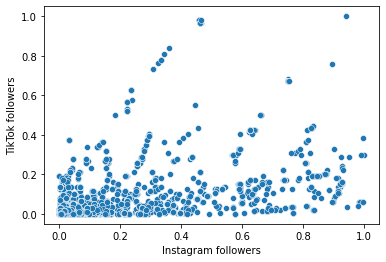

In [ ]:
sns.scatterplot(data=df_socials_scaled, x="Instagram followers", y="TikTok followers")


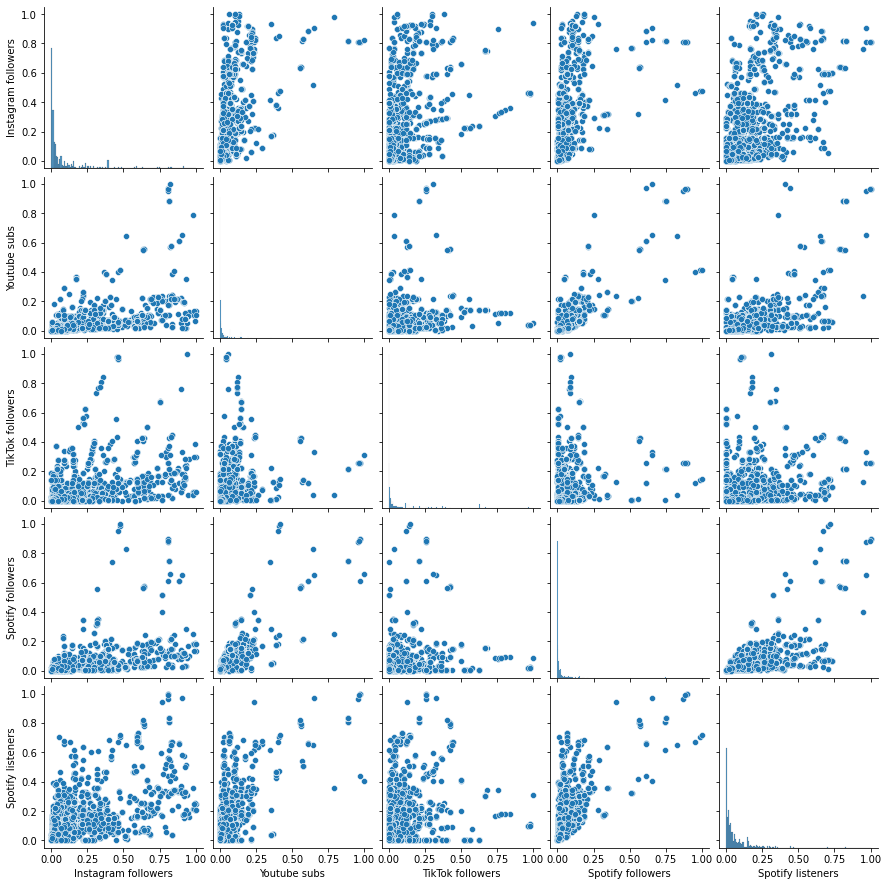

In [27]:
sns.pairplot(df_socials_scaled)
